In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

## Cleaning water level data files for all states 

In [3]:
def make_clean(file_name, cleaned_file_name):
    clean = open(cleaned_file_name, "w")
    f = open(file_name,'r')
    for line in f:
        if line[0:4] == 'USGS':
            clean.write(line+"\n")
    clean.close()
    f.close()

In [2]:
import os

directory_list = list()
for root, dirs, files in os.walk("states_data/", topdown=False):
    for name in dirs:
        directory_list.append(os.path.join(root, name))

print directory_list

['states_data/Missouri', 'states_data/alaska', 'states_data/new hampshire', 'states_data/illinois', 'states_data/Virginia', 'states_data/mississipi', 'states_data/Washington', 'states_data/Vermont', 'states_data/South Dakota', 'states_data/Georgia', 'states_data/Connecticut', 'states_data/Alabama', 'states_data/oklahoma', 'states_data/colorado', 'states_data/ohio', 'states_data/Maine', 'states_data/Utah', 'states_data/South Carolina', 'states_data/Delaware', 'states_data/Indiana', 'states_data/Arkansas', 'states_data/Iowa', 'states_data/new jersey', 'states_data/Wisconsin', 'states_data/Michigan', 'states_data/Arizona', 'states_data/montana', 'states_data/new york', 'states_data/Wyoming', 'states_data/Puerto rico', 'states_data/Minnesota', 'states_data/North Dakota', 'states_data/Florida', 'states_data/Massachussets', 'states_data/Kentucky', 'states_data/Louisiana', 'states_data/Maryland', 'states_data/Texas', 'states_data/Tennesee', 'states_data/Rhode Island', 'states_data/north carol

In [11]:
err_list = list()
for path in directory_list:
    try:
        make_clean(path+"/dv (1)", path+'/clean.txt')
    except:
        print "error in path ",path
        err_list.append(path)

error in path  states_data/Missouri
error in path  states_data/new hampshire
error in path  states_data/Washington
error in path  states_data/Vermont
error in path  states_data/South Dakota
error in path  states_data/Georgia
error in path  states_data/colorado
error in path  states_data/ohio
error in path  states_data/Maine
error in path  states_data/Delaware
error in path  states_data/Indiana
error in path  states_data/Arkansas
error in path  states_data/Wyoming
error in path  states_data/Minnesota
error in path  states_data/Massachussets
error in path  states_data/Kentucky
error in path  states_data/Texas
error in path  states_data/Rhode Island
error in path  states_data/north carolina
error in path  states_data/Nebraska
error in path  states_data/Oregon
error in path  states_data/new mexico


In [12]:
for path in err_list:
    try:
        make_clean(path+"/dv", path+'/clean.txt')
    except:
        print "error in path ",path

### Now each data file contain on necessary data

### create a dataframe where column will be one hydrological region

In [143]:
df = pd.read_table('states_data/Arkansas/clean.txt',error_bad_lines=False, low_memory=False)

In [144]:
df.head()

,USGS,330624091552801,1975-03-07,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,88.75,A
0,USGS,330624091552801,1975-03-08,NaN,NaN,NaN,NaN,89.01,A
1,USGS,330624091552801,1975-03-09,NaN,NaN,NaN,NaN,88.73,A
2,USGS,330624091552801,1975-03-10,NaN,NaN,NaN,NaN,88.49,A
3,USGS,330624091552801,1975-03-11,NaN,NaN,NaN,NaN,88.51,A
4,USGS,330624091552801,1975-03-12,NaN,NaN,NaN,NaN,88.32,A


In [22]:
df.columns = ['a', 'hydro','date','b','c','d','e','level','f']
df.drop(['a', 'b','c','d','e','f'], axis = 1, inplace=True)
df.head()

,hydro,date,level
0,330624091552801,1975-03-08,89.01
1,330624091552801,1975-03-09,88.73
2,330624091552801,1975-03-10,88.49
3,330624091552801,1975-03-11,88.51
4,330624091552801,1975-03-12,88.32


In [24]:
df['date'] = pd.to_datetime(df['date'])

In [25]:
df.head()

,hydro,date,level
0,330624091552801,1975-03-08,89.01
1,330624091552801,1975-03-09,88.73
2,330624091552801,1975-03-10,88.49
3,330624091552801,1975-03-11,88.51
4,330624091552801,1975-03-12,88.32


In [48]:
sites = set(df['hydro'])

In [49]:
df_list = list()
for site in sites:
    df_list.append(df.loc[df['hydro'] == site])

In [125]:
df_list[3].head(10)

,hydro,date,level
15606,330855092505601,1968-09-10,317.7
15607,330855092505601,1968-09-11,NaN
15608,330855092505601,1968-09-12,NaN
15609,330855092505601,1968-09-13,NaN
15610,330855092505601,1968-09-14,NaN
15611,330855092505601,1968-09-15,317.6
15612,330855092505601,1968-09-16,NaN
15613,330855092505601,1968-09-17,NaN
15614,330855092505601,1968-09-18,NaN
15615,330855092505601,1968-09-19,NaN


In [126]:
temp = df_list[3]
t2 = temp.set_index('date')
t2.head()

,hydro,level
date,,
1968-09-10,330855092505601,317.7
1968-09-11,330855092505601,NaN
1968-09-12,330855092505601,NaN
1968-09-13,330855092505601,NaN
1968-09-14,330855092505601,NaN


In [127]:
#t2.drop(['hydro'], axis = 1, inplace=True)

In [132]:
t2['level'] = t2['level'].apply(pd.to_numeric, errors='coerce')
t2.fillna(0)
t3 = t2.groupby(t2.index.year).mean()
t3.drop(['hydro'], axis = 1, inplace=True)

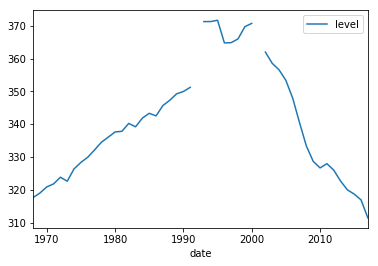

In [138]:
%matplotlib inline
t4 = t3.cumsum()
t3.plot()

In [ ]:
def plot_hydrolic_region(df):
    for path in directory_list:
        data_frame = pd.read_table(path + '/clean.txt',error_bad_lines=False, low_memory=False)
        

In [3]:
make_clean('utah_surface','surface_water_utah.txt')

In [3]:
warnings.filterwarnings('ignore')
df = pd.read_table('surface_water_utah.txt',error_bad_lines=False)

In [4]:
df.head()

,USGS,10010000,1900-01-17,4200.50,A:e
0,USGS,10010000,1900-01-18,NaN,NaN
1,USGS,10010000,1900-01-19,NaN,NaN
2,USGS,10010000,1900-01-20,NaN,NaN
3,USGS,10010000,1900-01-21,NaN,NaN
4,USGS,10010000,1900-01-22,NaN,NaN


In [5]:
df.columns = ['a', 'b', 'date','depth', 'status']

In [6]:
df.head()

,a,b,date,depth,status
0,USGS,10010000,1900-01-18,NaN,NaN
1,USGS,10010000,1900-01-19,NaN,NaN
2,USGS,10010000,1900-01-20,NaN,NaN
3,USGS,10010000,1900-01-21,NaN,NaN
4,USGS,10010000,1900-01-22,NaN,NaN


In [7]:
df.dtypes

a          object
b           int64
date       object
depth     float64
status     object
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])

In [9]:
df.head()

,a,b,date,depth,status
0,USGS,10010000,1900-01-18,NaN,NaN
1,USGS,10010000,1900-01-19,NaN,NaN
2,USGS,10010000,1900-01-20,NaN,NaN
3,USGS,10010000,1900-01-21,NaN,NaN
4,USGS,10010000,1900-01-22,NaN,NaN


In [10]:
df.shape

(62520, 5)

In [11]:
df2 = df[(df['date'].dt.year > 2012) & (df['date'].dt.year < 2017)]

In [12]:
df2.shape

(2922, 5)

In [13]:
# make depth column numeric and make invalid string to nan
df2['depth'] = df2['depth'].apply(pd.to_numeric, errors='coerce')

In [14]:
mean_depth = df2['depth'].mean(skipna=True)

In [15]:
print mean_depth

4193.39708077


In [16]:
df2['depth'].fillna(mean_depth, inplace=True)

In [17]:
print df2['depth'].max()

4197.2


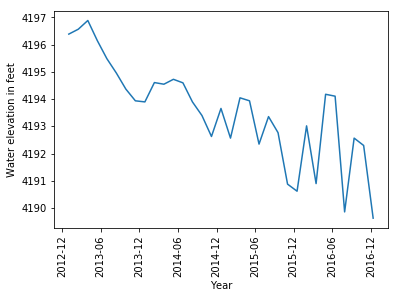

In [18]:
plt.cla()
df2 = df2.sort_values('date', ascending=True)
new_df2 = df2[::90]
new_df2.shape
plt.plot(new_df2['date'], new_df2['depth'])
plt.xticks(rotation='vertical')
plt.xlabel("Year")
plt.ylabel("Water elevation in feet")
plt.show()

In [19]:
df2.head()

,a,b,date,depth,status
41256,USGS,10010000,2013-01-01,4196.39,A
60095,USGS,10010100,2013-01-01,4195.78,A
60096,USGS,10010100,2013-01-02,4195.77,A
41257,USGS,10010000,2013-01-02,4196.37,A
41258,USGS,10010000,2013-01-03,4196.38,A


In [20]:
import datetime as dt
df2['date'] = pd.to_datetime(df2['date'])
df2['date']=df2['date'].map(dt.datetime.toordinal)

In [27]:
import statsmodels.api as sm
x = df2[["date"]][::45]
y = df2["depth"][::45]
model = sm.OLS((y-y.mean())/y.std(), (x-x.mean())/x.std()).fit()
predictions = model.predict(x-x.mean()/x.std())
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  depth   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.657
Method:                 Least Squares   F-statistic:                     125.2
Date:                Mon, 13 Nov 2017   Prob (F-statistic):           1.04e-16
Time:                        20:18:29   Log-Likelihood:                -56.493
No. Observations:                  65   AIC:                             115.0
Df Residuals:                      64   BIC:                             117.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
date          -0.8135      0.073    -11.191      0.000      -0.959      -0.668
==============================================================================
Omnibus:                        1.599   Durbin-Watson:                   1.063
Prob(Omnibus):                  0.449   Jarque-Bera (JB):                1.523
Skew:                           0.359   Prob(JB):                        0.467
Kurtosis:                       2.786   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
df2.head()

,a,b,date,depth,status
41256,USGS,10010000,734869,4196.39,A
60095,USGS,10010100,734869,4195.78,A
60096,USGS,10010100,734870,4195.77,A
41257,USGS,10010000,734870,4196.37,A
41258,USGS,10010000,734871,4196.38,A


In [132]:
tdate = dt.date(2015, 12, 1)

In [133]:
print tdate.toordinal()

735933


In [134]:
print model.predict(tdate.toordinal())

[ 4195.2988436]


In [32]:
Before = df2[::45]
date_before = Before["date"]
depth_before = Before["depth"]
date_before = (date_before-date_before.mean())/date_before.std()
depth_before = (depth_before-depth_before.mean())/depth_before.std()
plt.plot(date_before, depth_before, 'ro')
plt.plot(date_before, model.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])
plt.xlabel('Dates')
plt.ylabel('Depth')
plt.title('Simple Linear regressor')

Text(0.5,1,u'Simple Linear regressor')

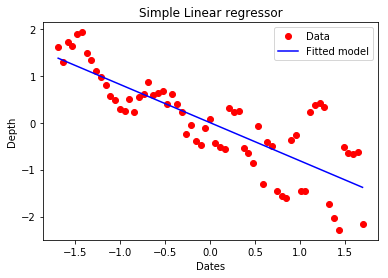

In [33]:
plt.show()